### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , StackingClassifier , VotingClassifier , AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , StratifiedKFold
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.pipeline import Pipeline , Parallel
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder , LabelBinarizer , MinMaxScaler , StandardScaler , RobustScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_recall_fscore_support

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lazypredict.Supervised import LazyClassifier
from mrmr import mrmr_classif

import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
# load the entire csv data

df = pd.read_csv("dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
# return a random sample of items

df.sample(5, random_state = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
395,396,0,3,"Johansson, Mr. Erik",male,22.00,0,0,350052,7.80,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.85,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.27,NaN,S
702,703,0,3,"Barbara, Miss. Saiide",female,18.00,0,1,2691,14.45,NaN,C


In [5]:
# get shape of the dataframe

df.shape

(891, 12)

In [7]:
# column names

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS

In [10]:
# concise summary of the dataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# descriptive statistics of numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [18]:
# get a count of distinct elements present in every column

unique_col_cnt = pd.DataFrame(df.nunique() , columns = ['Unique Count'])
unique_col_cnt

,Unique Count
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [20]:
# 38% out of the total people given in this dataset survived 

df['Survived'].value_counts(normalize = True)

0   0.62
1   0.38
Name: Survived, dtype: float64

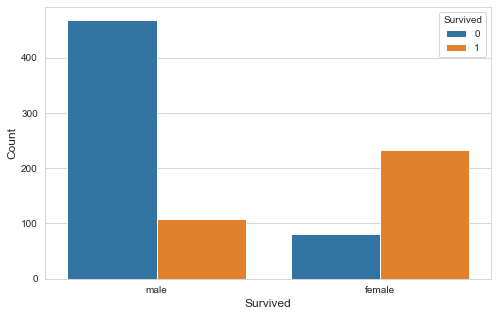

In [22]:
# more number of females survived in comparison to males

plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
sns.countplot(x = df["Sex"] , hue = df["Survived"])
plt.ylabel('Count' , fontsize = 12)
plt.xlabel('Survived' , fontsize = 12)
plt.show()

In [25]:
# distribution of passengers in different embarked ports

df['Embarked'].value_counts(normalize = True)

S   0.72
C   0.19
Q   0.09
Name: Embarked, dtype: float64

In [27]:
# distribution of passengers in different class

df['Pclass'].value_counts(normalize = True)

3   0.55
1   0.24
2   0.21
Name: Pclass, dtype: float64

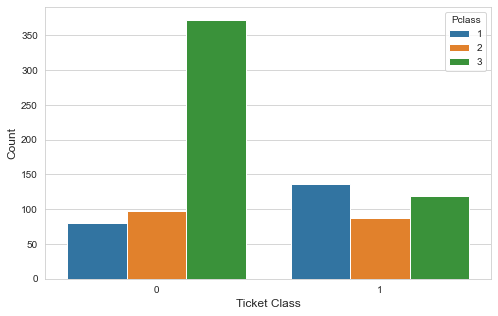

In [32]:
# people in class 1 had a higher survival rate

plt.figure(figsize = (8, 5))
sns.countplot(x = df["Survived"] , hue = df["Pclass"])
plt.ylabel('Count' , fontsize = 12)
plt.xlabel('Ticket Class' , fontsize = 12)
plt.show()

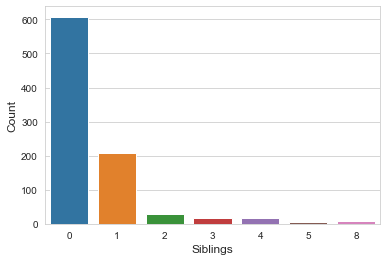

In [33]:
# most of the passengers had no or less siblings/spouses

sns.countplot(x = "SibSp" , data = df)
plt.ylabel('Count' , fontsize = 12)
plt.xlabel('Siblings' , fontsize = 12)
plt.show()

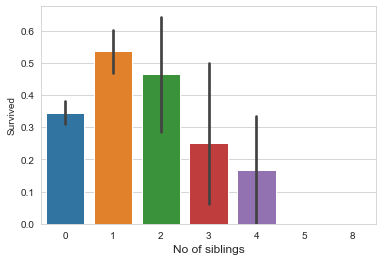

In [35]:
# bar plot depicting no of siblings vs survival rate - people with one or two siblings/spouse had more survival chances

sns.barplot(x = df["SibSp"], y = df["Survived"])
plt.xlabel('No of siblings' , fontsize = 12)
plt.show()

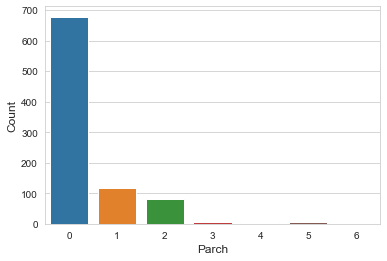

In [37]:
# most of the passengers came alone

sns.countplot(x = df["Parch"])
plt.ylabel('Count' , fontsize = 12)
plt.xlabel('Parch' , fontsize = 12)
plt.show()

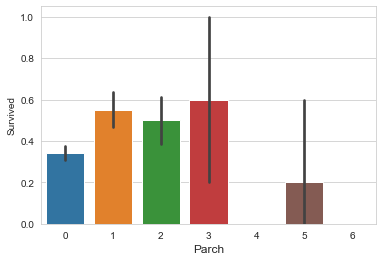

In [38]:
# people with 1 and less than four parents/children aboard had a better survival rate

sns.barplot(x = df["Parch"] , y = df["Survived"])
plt.xlabel('Parch' , fontsize = 12)
plt.show()

0.38910778230082704


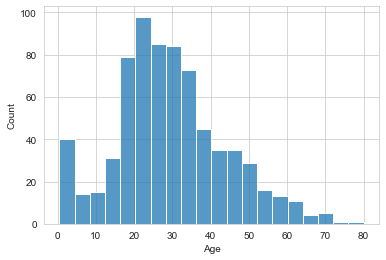

In [40]:
# histogram plot for age

print(df.Age.skew())
sns.histplot(df['Age'])
plt.show()

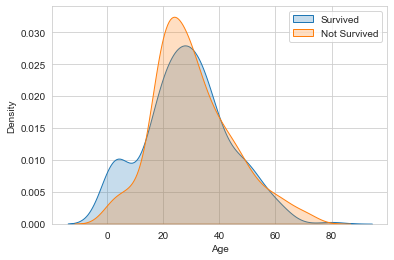

In [42]:
# visualizing survival rate for different age groups

sns.kdeplot(df.loc[(df['Survived']==1) , 'Age'] , fill = True)
sns.kdeplot(df.loc[(df['Survived']==0) , 'Age'] , fill = True)
plt.legend(['Survived' , 'Not Survived'])
plt.show()

4.787316519674893


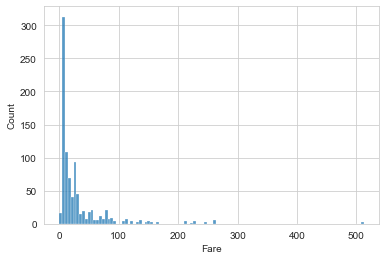

In [45]:
# histogram plot for fare - here large value of skewness indicates presence of outliers
# as for a normal distribution, the skewness value should be within -1 to 1 range

print(df.Fare.skew())
sns.histplot(df['Fare'])
plt.show()

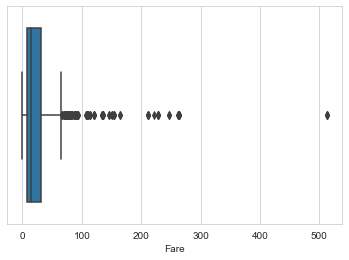

In [47]:
# box plot confirms the presence of outliers (black dots)

sns.boxplot(df['Fare'])
plt.show()

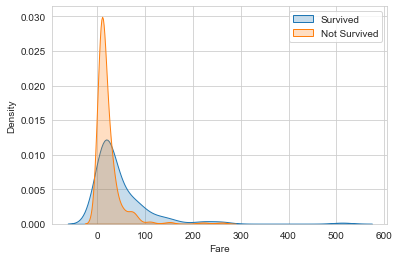

In [51]:
# visualizing surival rate with respect to fare distribution

sns.kdeplot(df.loc[(df['Survived']==1) , 'Fare'] , fill = True)
sns.kdeplot(df.loc[(df['Survived']==0) , 'Fare'] , fill = True)
plt.legend(['Survived' , 'Not Survived'])
plt.show()

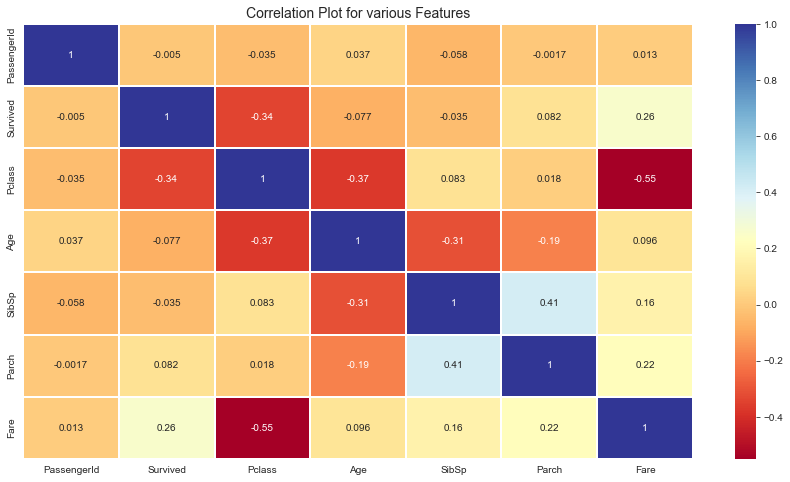

In [52]:
# visualizing correlation among various features

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, linewidth=0.15, cmap="RdYlBu")
plt.title("Correlation Plot for various Features", fontsize = 14)
plt.show()

### DATA PRE-PROCESSING

#### HANDLING MISSING/NULL VALUES

In [53]:
# get columns with missing or nan values

missing_cols = df.isnull().sum()
missing_percent = df.isnull().sum()/df.shape[0]*100

missing_df = pd.concat([missing_cols , missing_percent] , axis=1 , keys = ['Values Missing', '% Missing'])
missing_df = missing_df[missing_df.iloc[: , 1] != 0].sort_values('Values Missing' , ascending = False).round(2)
missing_df

,Values Missing,% Missing
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [54]:
# drop cabin column as it has lot of missing values

df.drop('Cabin' , axis=1 , inplace = True)

In [55]:
# impute embarked column with mode as it has just 2 missing values

for i in df['Embarked'].unique()[:-1]:
    print(f"People strength embarking in {i} = {df[df['Embarked'] == i].shape[0]}")
    
df.fillna(value = {'Embarked' : 'S'} , inplace = True)

People strength embarking in S = 644
People strength embarking in C = 168
People strength embarking in Q = 77


In [56]:
# impute age with mean or median

mean , std = df["Age"].mean() ,  df["Age"].std()
total_null = df["Age"].isnull().sum()
impute_ages = np.random.randint(low = mean - std, high = mean + std, size = total_null)
temp_age = df["Age"].copy()
temp_age[np.isnan(temp_age)] = impute_ages
df["Age"] = temp_age
df["Age"] = df["Age"].astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S


#### HANDLING OUTLIERS


In [57]:
# outlier detection and removal based on inter-quartile range technique

Q1 , Q3 = df['Fare'].quantile(0.25) , df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
print(upper_bound , lower_bound)

fare_outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(fare_outliers.shape)
fare_outliers.head()

65.6344 -26.724
(116, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.00,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,23,1,0,PC 17569,146.52,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.17,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.73,C


In [58]:
df.loc[df['Fare'] > upper_bound , 'Fare'] = upper_bound
print(df['Fare'].skew())

1.082178592000912


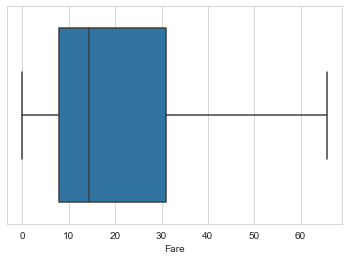

In [59]:
# outliers are removed now

sns.boxplot(df['Fare'])
plt.show()

#### FEATURE ENGINEERING

In [60]:
# create new Age feature by binning them

df['AgeBins'] = pd.cut(df['Age'] , bins=[0,10,20,45,100], labels=['Child','Teen','Adult','Elder'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBins
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.63,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S,Adult


In [61]:
# create new feature FamilySize as a combination of SibSp and Parch

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [62]:
def familyGroup(size):
    if (size <= 1):
        return 'Single'
    elif (size > 1 and size <= 5):
        return 'Small'
    else:
        return 'Large'

df['FamilyGroup'] = df['FamilySize'].apply(familyGroup)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBins,FamilySize,FamilyGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,Adult,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.63,C,Adult,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,S,Adult,1,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,S,Adult,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S,Adult,1,Single


In [63]:
# create bin for Fare features

df['FareBin'] = pd.cut(df['Fare'] , bins=[0,8,32,520] , labels=['Low','Medium','High'])

#### DROP IRRELEVANT COLUMNS

In [64]:
# drop columns irrelevant from classification perspective

df.drop(['PassengerId' , 'Name' , 'Ticket'] , axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBins,FamilySize,FamilyGroup,FareBin
0,0,3,male,22,1,0,7.25,S,Adult,2,Small,Low
1,1,1,female,38,1,0,65.63,C,Adult,2,Small,High
2,1,3,female,26,0,0,7.92,S,Adult,1,Single,Low
3,1,1,female,35,1,0,53.10,S,Adult,2,Small,High
4,0,3,male,35,0,0,8.05,S,Adult,1,Single,Medium


### FEATURE SELECTION

- Here we are using Information Gain as our feature selection technique that evaluates the Information gain of each feature in the context of the target variable.

In [65]:
# make a copy of dataframe
df_temp = df.copy()

# label encode categorical variables
for col in df_temp.columns:
    if df_temp[col].dtype in ['object' , 'category']:
        le = LabelEncoder()
        df_temp[col] = le.fit_transform(df_temp[col])

# perform min-max normalization to scale values in a particular range
df_temp = df_temp.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
df_temp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBins,FamilySize,FamilyGroup,FareBin
0,0.00,1.00,1.00,0.28,0.12,0.00,0.11,1.00,0.00,0.10,1.00,0.33
1,1.00,0.00,0.00,0.47,0.12,0.00,1.00,0.00,0.00,0.10,1.00,0.00
2,1.00,1.00,0.00,0.33,0.00,0.00,0.12,1.00,0.00,0.00,0.50,0.33
3,1.00,0.00,0.00,0.44,0.12,0.00,0.81,1.00,0.00,0.10,1.00,0.00
4,0.00,1.00,1.00,0.44,0.00,0.00,0.12,1.00,0.00,0.00,0.50,0.67


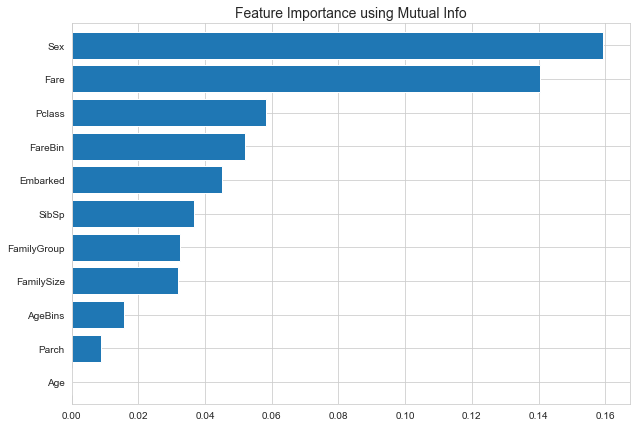

In [66]:
# estimate mutual information for a discrete target variable - higher values indicate higher dependency

important = mutual_info_classif(df_temp.iloc[:, 1:] , df_temp.Survived , n_neighbors = 3 , random_state = 50)
important = pd.Series(important , df_temp.iloc[:, 1:].columns)
important.sort_values(ascending=True, inplace=True)
plt.figure(figsize = (10, 7))
plt.title("Feature Importance using Mutual Info", fontsize = 14)
important.plot(kind = 'barh' , width=0.8)
plt.show()

In [67]:
# drop Age column from original dataframe as it shows least dependency in Information Gain
# also we have binned this feature

df.drop('Age' , axis = 1 , inplace = True)

### CATEGORICAL ENCODING 

- Label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them.

- So, we convert categorical variable into dummy/indicator variables 

In [68]:
df = pd.get_dummies(df, columns = ["Sex", "Embarked", "AgeBins", "FareBin" , "FamilyGroup"],
                             prefix = ["Gender", "Embark", "AgeGrp", "FareType", "Family"])
df.head()

,Survived,Pclass,SibSp,Parch,Fare,FamilySize,Gender_female,Gender_male,Embark_C,Embark_Q,...,AgeGrp_Child,AgeGrp_Teen,AgeGrp_Adult,AgeGrp_Elder,FareType_Low,FareType_Medium,FareType_High,Family_Large,Family_Single,Family_Small
0,0,3,1,0,7.25,2,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,1,1,1,0,65.63,2,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,1,3,0,0,7.92,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,1,1,0,53.10,2,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,3,0,0,8.05,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [72]:
df.shape

(891, 21)

#### VISUALIZING CORRELATION AMONG FEATURES

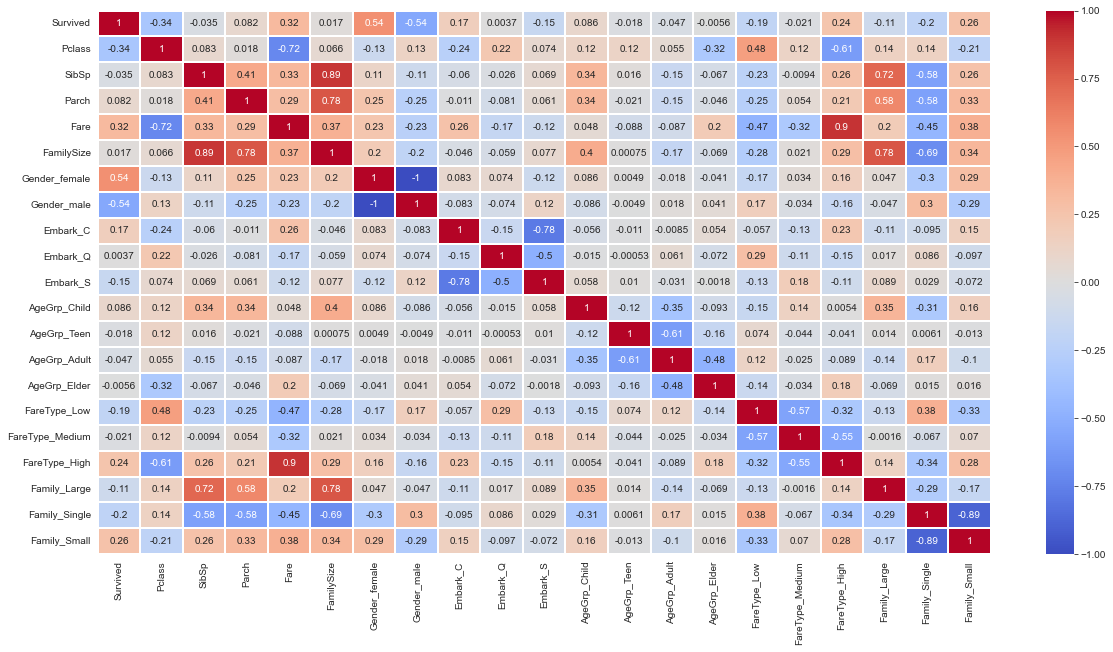

In [75]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.15)
plt.show()

### SPLIT DATA INTO TRAIN AND TEST SET

In [76]:
labels = df['Survived'].values
dataset = df.iloc[: , 1:].values

x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.25, random_state = 3, stratify=labels)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(668, 20) (668,)
(223, 20) (223,)


### FEATURE SCALING (or NORMALIZATION)

In [77]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### MODEL TRAINING AND EVALUATION

In [78]:
# This module helps in fitting all classification algorithms (with their default params) available in Sklearn, parallely. 

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [79]:
models , _ = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.27it/s]


In [80]:
models.sort_values(by = ['Accuracy', 'F1 Score'] , ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.88,0.88,0.88,0.88,0.82
LGBMClassifier,0.88,0.87,0.87,0.88,0.08
RandomForestClassifier,0.87,0.87,0.87,0.87,0.18
AdaBoostClassifier,0.87,0.87,0.87,0.87,0.10
SVC,0.87,0.86,0.86,0.87,0.03
NuSVC,0.87,0.86,0.86,0.87,0.05
LabelSpreading,0.87,0.86,0.86,0.87,0.04
LogisticRegression,0.87,0.85,0.85,0.86,0.02
GaussianNB,0.86,0.86,0.86,0.86,0.01


In [81]:
model_dictionary = clf.provide_models(x_train,x_test,y_train,y_test)
model_dictionary.keys()

dict_keys(['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LabelPropagation', 'LabelSpreading', 'LinearDiscriminantAnalysis', 'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'NuSVC', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'XGBClassifier', 'LGBMClassifier'])

#### Some of the top performing Classifiers are:
- LGBMClassifier
- XGBClassifier
- Random Forests
- SVC
- Adaboost

### HYPER-PARAMETER TUNING
- Here we are gonna use Random Search for hyper parameter tuning
- Other approaches include: Grid Search and Bayesian Optimization

In [90]:
class2label = {0: 'Not Survived', 1: 'Survived'}

cr_indexes = list(class2label.keys())
classes = list(class2label.values())


def metrics_plot(df, metric):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=df, x=df.index, y=metric, palette = "Blues_d", )
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5), rotation = 'horizontal', textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 14)
    ax.set_ylabel(metric,fontsize = 14)
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False) 
    plt.title(metric+ ' Results per Class', fontsize = 14);

#### SVC

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best Params: {'gamma': 0.01, 'C': 1000}
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       137
           1       0.89      0.78      0.83        86

    accuracy                           0.88       223
   macro avg       0.88      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223

              precision    recall  f1-score   support

Not Survived       0.87      0.94      0.91       137
    Survived       0.89      0.78      0.83        86

    accuracy                           0.88       223
   macro avg       0.88      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223

----------------- Overall Results -----------------
Accuracy Result: 87.89%
Precision Result: 88.25%
Recall Result: 86.03%
F1-Score Result: 86.88%


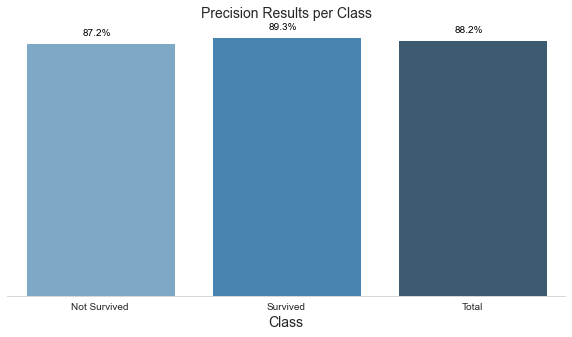

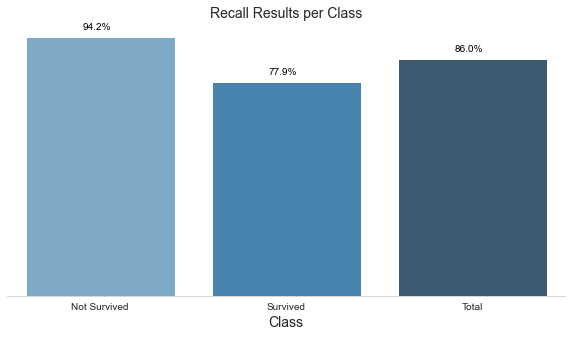

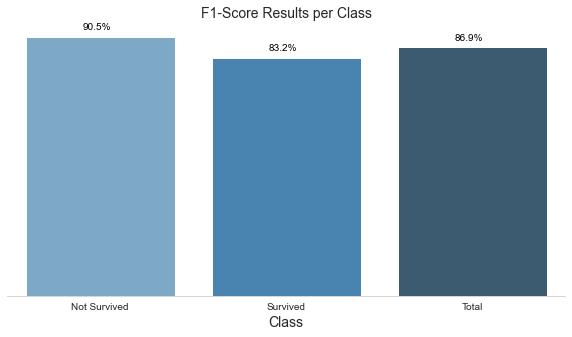

In [91]:
# dictionary of parameters to be tried out
n_iter_search = 20
param_dist = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
}

# random search with cross validation
estimator = SVC(kernel='rbf', decision_function_shape='ovr', probability=True, random_state=3)
random_search = RandomizedSearchCV(estimator = estimator,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1,
                                   refit = True,
                                   cv = 2,
                                   verbose = 2,
                                   random_state = 3
                                  )
random_search.fit(x_train, y_train)

# best params
svc_bp = random_search.best_params_
print("Best Params:", svc_bp)

# model fit
svc = SVC(decision_function_shape = "ovr", probability = True , kernel = "rbf", random_state = 3, **svc_bp)
svc.fit(x_train, y_train)

# prediction
preds = svc.predict(x_test)
print(classification_report(y_test, preds))
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')        # Results by each Class
metrics_plot(all_df, 'Recall')           # Results by each Class
metrics_plot(all_df, 'F1-Score')         # Results by each Class
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy 
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision 
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall 
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      # F1-Score 

#### LIGHT GBM

In [102]:
lgbmclf = LGBMClassifier(boosting_type="dart", objective='binary', num_leaves=400, learning_rate=0.1, 
                          max_depth = 10, reg_alpha=0.1, reg_lambda=0.1, n_jobs=-1)

lgbmclf.fit(x_train, y_train)

LGBMClassifier(boosting_type='dart', max_depth=10, num_leaves=400,
               objective='binary', reg_alpha=0.1, reg_lambda=0.1)

              precision    recall  f1-score   support

Not Survived       0.89      0.94      0.91       137
    Survived       0.90      0.81      0.85        86

    accuracy                           0.89       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.89      0.89      0.89       223

----------------- Overall Results -----------------
Accuracy Result: 89.24%
Precision Result: 89.35%
Recall Result: 87.78%
F1-Score Result: 88.43%


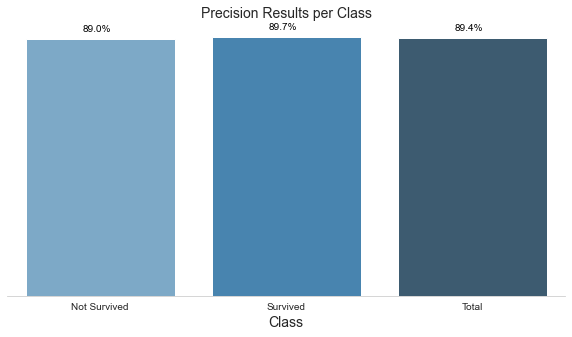

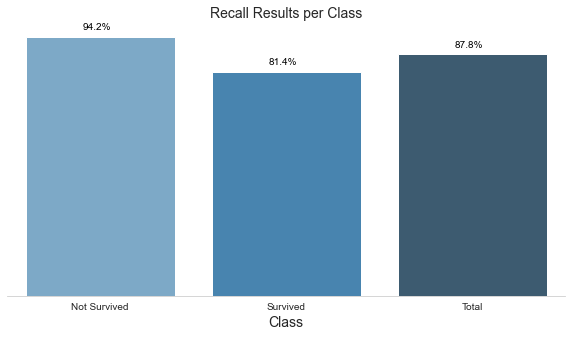

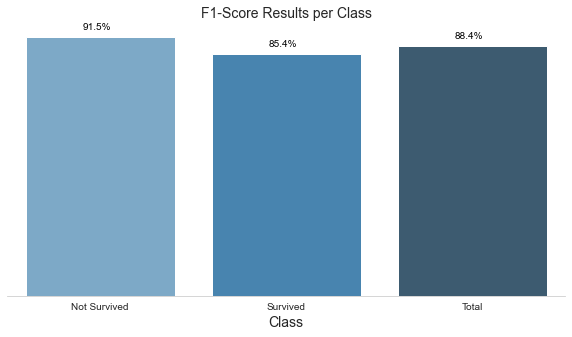

In [105]:
preds = lgbmclf.predict(x_test)
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')      
metrics_plot(all_df, 'Recall')         
metrics_plot(all_df, 'F1-Score')       
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))     

#### XGBCLASSIFIER

Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best params: {'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 2, 'max_depth': 10, 'gamma': 2, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

Not Survived       0.89      0.91      0.90       137
    Survived       0.86      0.83      0.84        86

    accuracy                           0.88       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223

----------------- Overall Results -----------------
Accuracy Result: 87.89%
Precision Result: 87.41%
Recall Result: 86.90%
F1-Score Result: 87.14%


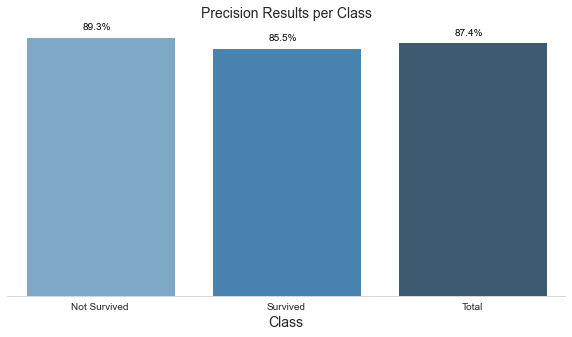

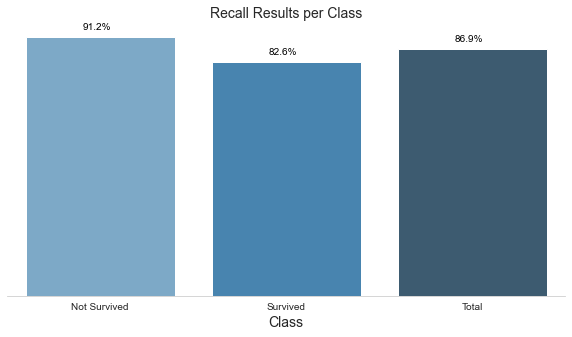

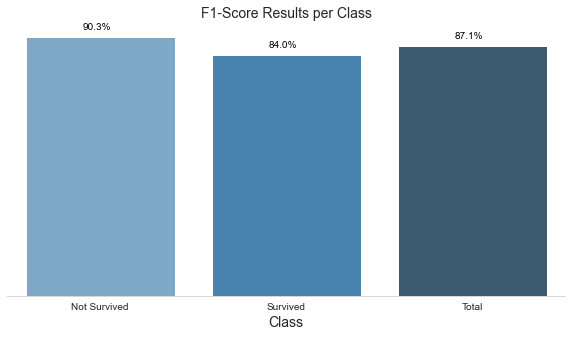

In [107]:
n_iter_search = 25
param_dist = {
    'n_estimators' : [100,200,300,400],
    'min_child_weight': [2, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 10]
}

estimator = XGBClassifier(learning_rate=0.02, n_jobs=-1, random_state=3)
random_search = RandomizedSearchCV(estimator = estimator,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1,
                                   refit = True,
                                   cv = 2,
                                   verbose = 2,
                                   random_state = 3
                                  )
random_search.fit(x_train, y_train)

xgb_bp = random_search.best_params_
print("Best params:", xgb_bp)

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, min_child_weight=xgb_bp['min_child_weight'], 
                    max_depth=xgb_bp['max_depth'], gamma=xgb_bp['gamma'], 
                    subsample=xgb_bp['subsample'], colsample_bytree=xgb_bp['colsample_bytree'], 
                    n_jobs=-1, random_state=3)
xgb.fit(x_train, y_train)

preds = xgb.predict(x_test)
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')       
metrics_plot(all_df, 'Recall')          
metrics_plot(all_df, 'F1-Score')         
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                  
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100)) 

#### ADABOOST

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best params: {'n_estimators': 20, 'learning_rate': 0.99, 'algorithm': 'SAMME.R'}
              precision    recall  f1-score   support

Not Survived       0.89      0.91      0.90       137
    Survived       0.86      0.83      0.84        86

    accuracy                           0.88       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223

----------------- Overall Results -----------------
Accuracy Result: 87.89%
Precision Result: 87.41%
Recall Result: 86.90%
F1-Score Result: 87.14%


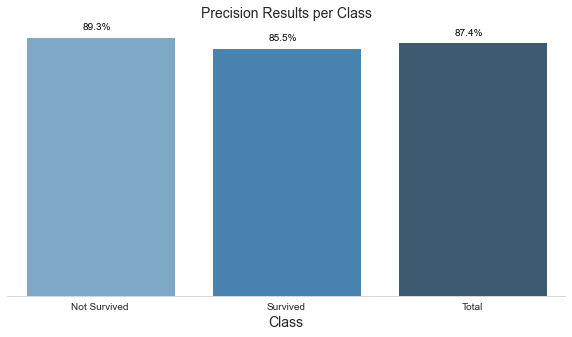

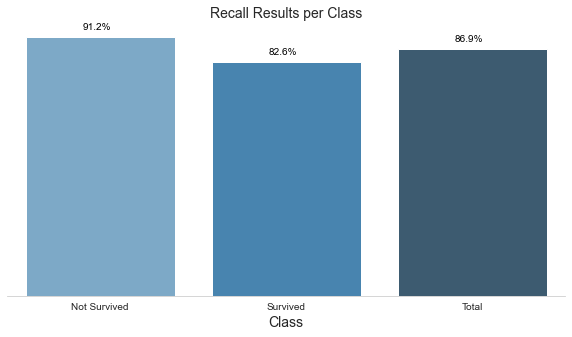

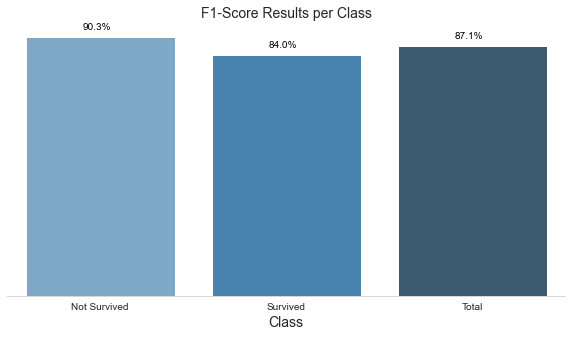

In [116]:
n_iter_search = 20
param_dist = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

estimator = AdaBoostClassifier()
random_search = RandomizedSearchCV(estimator = estimator,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1,
                                   refit = True,
                                   cv = 2,
                                   verbose = 2
                                  )
random_search.fit(x_train, y_train)

adab_bp = random_search.best_params_
print("Best params:", adab_bp)

# model fit
adab = AdaBoostClassifier(n_estimators = adab_bp['n_estimators'], learning_rate = adab_bp['learning_rate'], 
                          algorithm = adab_bp['algorithm'])
adab.fit(x_train, y_train)

# prediction
preds = adab.predict(x_test)
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')      
metrics_plot(all_df, 'Recall')          
metrics_plot(all_df, 'F1-Score')       
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))       
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      

#### RANDOM FORESTS

Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best Params: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
              precision    recall  f1-score   support

Not Survived       0.89      0.93      0.91       137
    Survived       0.88      0.83      0.85        86

    accuracy                           0.89       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.89      0.89      0.89       223

----------------- Overall Results -----------------
Accuracy Result: 88.79%
Precision Result: 88.55%
Recall Result: 87.63%
F1-Score Result: 88.03%


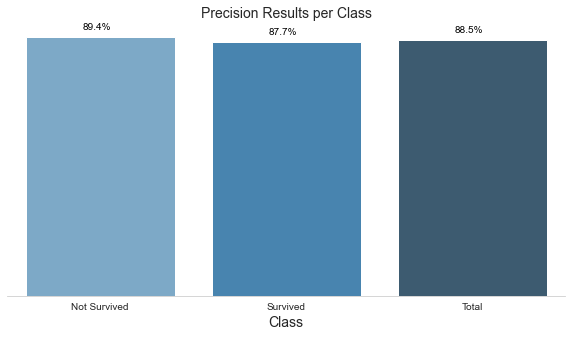

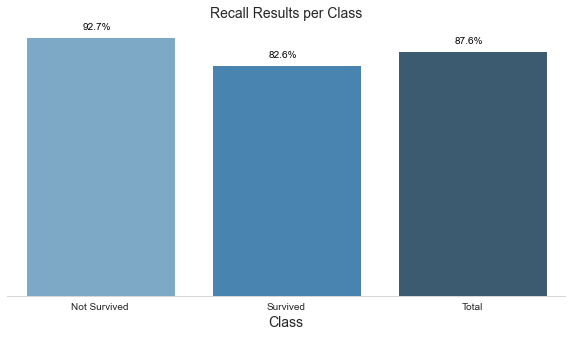

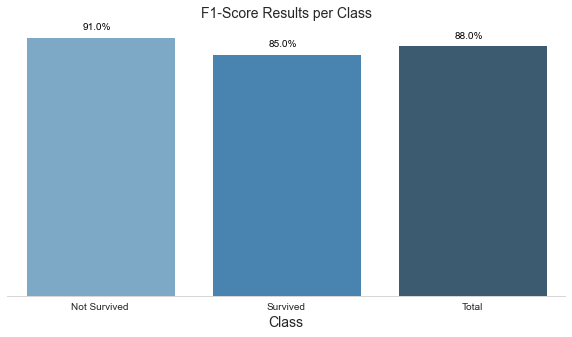

In [117]:
n_iter_search = 25
param_dist = {
    'max_depth': [4, 5, 10, 20],
    'min_samples_leaf': [2, 4, 5, 10],
    'min_samples_split': [2, 4, 5, 10],
    'n_estimators': [100, 200, 400, 600]
}

estimator = RandomForestClassifier(random_state=3)
random_search = RandomizedSearchCV(estimator = estimator,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1,
                                   refit = True,
                                   cv = 2,
                                   verbose = 2,
                                   random_state = 3
                                  )
random_search.fit(x_train, y_train)

rfc_bp = random_search.best_params_
print("Best Params:", rfc_bp)

rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=rfc_bp['max_depth'], max_features='auto', 
                             min_samples_leaf=rfc_bp['min_samples_leaf'], min_samples_split=rfc_bp['min_samples_split'], 
                             n_estimators=rfc_bp['n_estimators'], n_jobs=-1, 
                             random_state=3, verbose=0)
rfc.fit(x_train, y_train)

preds = rfc.predict(x_test)
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')      
metrics_plot(all_df, 'Recall')          
metrics_plot(all_df, 'F1-Score')         
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      

### VOTING BASED ENSEMBLE LEARNING

In [125]:
vote = VotingClassifier(estimators = [('lgbm', lgbmclf), ('rfc', rfc), ('svm', svc)], 
                         voting = 'soft', n_jobs=-1, verbose = 0)
vote.fit(x_train, y_train)

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(boosting_type='dart', max_depth=10,
                                             num_leaves=400, objective='binary',
                                             reg_alpha=0.1, reg_lambda=0.1)),
                             ('rfc',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=600,
                                                     n_jobs=-1,
                                                     random_state=3)),
                             ('svm',
                              SVC(C=1000, gamma=0.01, probability=True,
                                  random_state=3))],
                 n_jobs=-1, verbose=0, voting='soft')

              precision    recall  f1-score   support

Not Survived       0.90      0.94      0.92       137
    Survived       0.90      0.83      0.86        86

    accuracy                           0.90       223
   macro avg       0.90      0.88      0.89       223
weighted avg       0.90      0.90      0.90       223

----------------- Overall Results -----------------
Accuracy Result: 89.69%
Precision Result: 89.73%
Recall Result: 88.36%
F1-Score Result: 88.94%


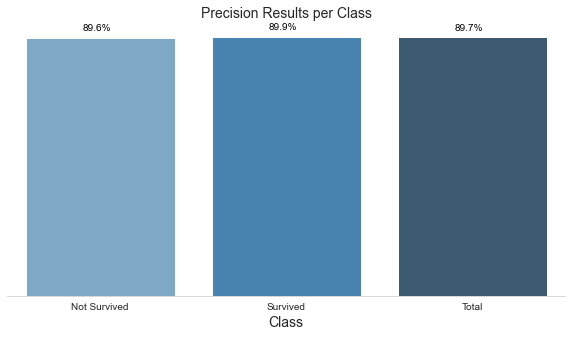

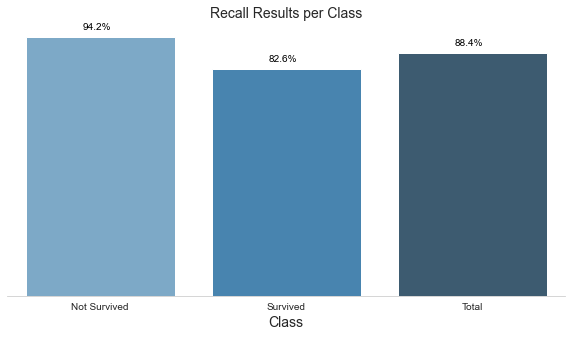

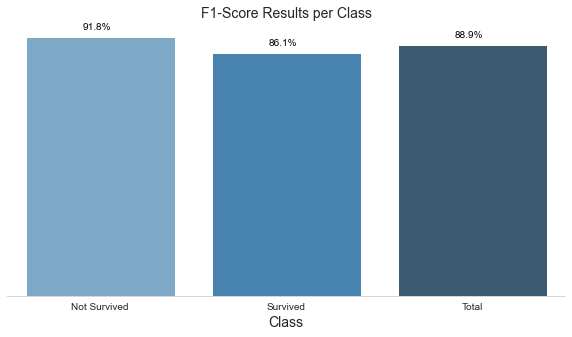

In [126]:
preds = vote.predict(x_test)
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')       
metrics_plot(all_df, 'Recall')         
metrics_plot(all_df, 'F1-Score')         
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))   
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      

### STACKING CLASSIFIER

- It consists of stacking the output of individual estimator (base classifiers) and use a meta classifier on top of it to compute the final prediction.

              precision    recall  f1-score   support

Not Survived       0.91      0.93      0.92       137
    Survived       0.88      0.86      0.87        86

    accuracy                           0.90       223
   macro avg       0.90      0.89      0.90       223
weighted avg       0.90      0.90      0.90       223

----------------- Overall Results -----------------
Accuracy Result: 90.13%
Precision Result: 89.73%
Recall Result: 89.37%
F1-Score Result: 89.54%


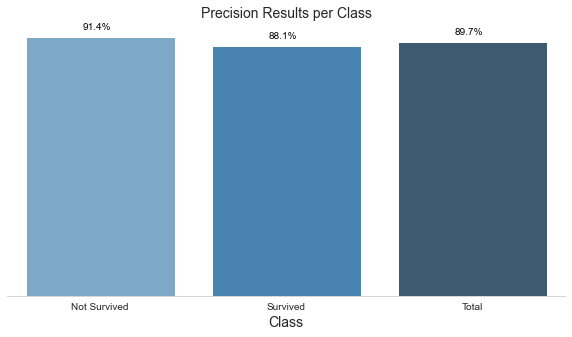

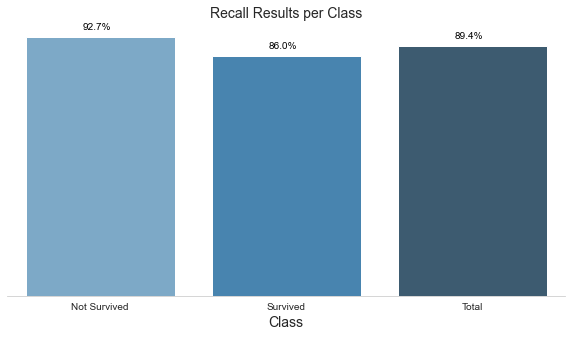

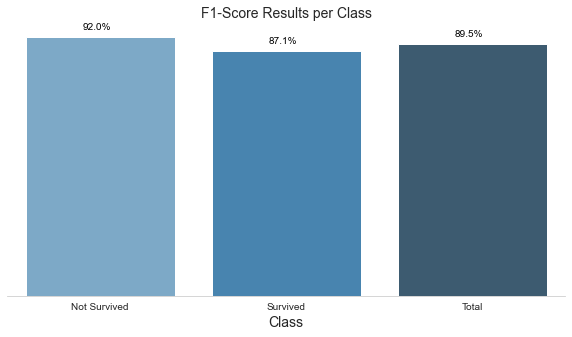

In [140]:
stack = StackingClassifier(estimators = [('lgbm', lgbmclf), ('rfc', rfc), ('svm', svc)], 
                           final_estimator = SVC(), cv=5, n_jobs=-1)
stack.fit(x_train , y_train)

preds = stack.predict(x_test)
print(classification_report(y_test, preds, labels = cr_indexes, target_names = classes))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

metrics_plot(all_df, 'Precision')       # Results by each Class
metrics_plot(all_df, 'Recall')          # Results by each Class
metrics_plot(all_df, 'F1-Score')         # Results by each Class
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                    # Accuracy  
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))      # Precision 
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))         # Recall 
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))       # F1-Score

## Final Results for Survival Prediction
- Accuracy: 90.13%
- F1-Score: 89.54%